In [3]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model , load_model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D

from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy  as np
import pandas as pd


In [6]:
train_img_generator = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
train_generator = train_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/beertest01/train' , 
    target_size = (100, 100) , 
    batch_size  = 40 ,
    class_mode = 'categorical'
)

Found 600 images belonging to 3 classes.


In [7]:
test_img_generator = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
test_generator = test_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/beertest01/test' , 
    target_size = (100, 100) , 
    batch_size  = 40 ,
    class_mode = 'categorical'
)

Found 48 images belonging to 3 classes.


In [8]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (100, 100, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 3) )
  img_model.add( Activation('softmax') )

  return img_model 


In [9]:
model = img_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 activation (Activation)     (None, 98, 98, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                        

In [10]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

C:\Users\crid2\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
model_history = model.fit(train_generator , validation_data=test_generator, epochs = 25 ,  verbose = 1 )

Epoch 1/25
15/15 [==============================] - 12s 657ms/step - loss: 1.2122 - accuracy: 0.5700 - val_loss: 1.0919 - val_accuracy: 0.3333
Epoch 2/25
15/15 [==============================] - 7s 473ms/step - loss: 0.8205 - accuracy: 0.5950 - val_loss: 0.9434 - val_accuracy: 0.6042
Epoch 3/25
15/15 [==============================] - 7s 483ms/step - loss: 0.7251 - accuracy: 0.6600 - val_loss: 0.8367 - val_accuracy: 0.5833
Epoch 4/25
15/15 [==============================] - 7s 497ms/step - loss: 0.5537 - accuracy: 0.7517 - val_loss: 0.8024 - val_accuracy: 0.5833
Epoch 5/25
15/15 [==============================] - 8s 529ms/step - loss: 0.6058 - accuracy: 0.7517 - val_loss: 0.7860 - val_accuracy: 0.6875
Epoch 6/25
15/15 [==============================] - 8s 525ms/step - loss: 0.4916 - accuracy: 0.7800 - val_loss: 0.8957 - val_accuracy: 0.6458
Epoch 7/25
15/15 [==============================] - 8s 539ms/step - loss: 0.5242 - accuracy: 0.8067 - val_loss: 0.6410 - val_accuracy: 0.7500
Epoch

In [12]:
print('모델 저장')
model.save('exampe02-3model-case.h12')

모델 저장
INFO:tensorflow:Assets written to: exampe02-3model-case.h12\assets


In [13]:
with open('C:/Users/crid2/ml-data/trainbeer_model_20220503test.tflite', 'wb') as f:
  f.write(tflite_model)


NameError: name 'tflite_model' is not defined

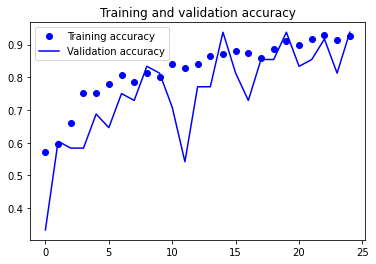

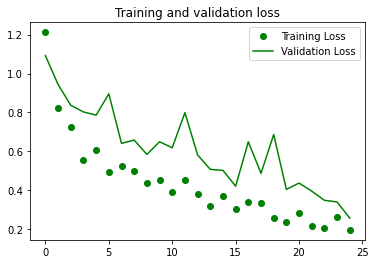

In [14]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()